<a href="https://colab.research.google.com/github/Shubhangiwaghmare7/Data-Science/blob/main/CifarDataSET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

In [3]:
X_train.shape,y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [4]:
X_test.shape,y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [5]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','house','ship','truck']

In [6]:
classes[y_train[1][0]]

'truck'

In [7]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

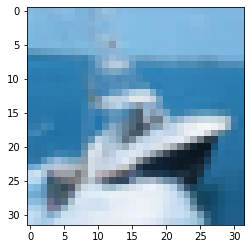

In [8]:
#visualization of data
plt.imshow(X_train[8])

In [9]:
classes[y_train[1][0]]

'truck'

In [10]:
#normalizing the data (0,1)
#pixel=0.255
X_train,X_test=X_train/255.0,X_test/255.0
#converting to categorical data
y_train,y_test=to_categorical(y_train),to_categorical(y_test)

In [11]:
#

In [19]:
#model architecture
model= Sequential()

model.add(Conv2D(32,3,activation='relu',kernel_initializer='he_uniform'))#Con Layer 1
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,3,activation='relu',kernel_initializer='he_uniform'))#Con Layer 2
model.add(MaxPool2D(2,2))

model.add(Conv2D(128,3,activation='relu',kernel_initializer='he_uniform'))#Con Layer 3
model.add(MaxPool2D(2,2))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64,activation='sigmoid'))
model.add(Dropout(0.2))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation='softmax'))
model.add(Dropout(0.2))

In [21]:
model.compile('SGD',loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
model.fit(X_train,y_train,epochs=30,batch_size=32)

Epoch 1/30
1563/1563 [==============================] - 7s 4ms/step - loss: 4.8941 - accuracy: 0.1170
Epoch 2/30
1563/1563 [==============================] - 6s 4ms/step - loss: 4.6762 - accuracy: 0.1856
Epoch 3/30
1563/1563 [==============================] - 6s 4ms/step - loss: 4.6920 - accuracy: 0.2105
Epoch 4/30
1563/1563 [==============================] - 6s 4ms/step - loss: 4.5856 - accuracy: 0.2474
Epoch 5/30
1563/1563 [==============================] - 6s 4ms/step - loss: 4.5209 - accuracy: 0.2727
Epoch 6/30
1563/1563 [==============================] - 6s 4ms/step - loss: 4.4777 - accuracy: 0.3016
Epoch 7/30
1563/1563 [==============================] - 6s 4ms/step - loss: 4.4398 - accuracy: 0.3203
Epoch 8/30
1563/1563 [==============================] - 6s 4ms/step - loss: 4.4095 - accuracy: 0.3357
Epoch 9/30
1563/1563 [==============================] - 6s 4ms/step - loss: 4.3378 - accuracy: 0.3533
Epoch 10/30
1563/1563 [==============================] - 6s 4ms/step - loss: 4.284

In [24]:
y_pred=model.predict(X_test)
y_pred

array([[1.91063993e-02, 2.47629769e-02, 4.30001803e-02, ...,
        3.50783728e-02, 1.73322052e-01, 5.34238629e-02],
       [3.75068039e-02, 8.54238093e-01, 2.52554542e-04, ...,
        1.73904864e-05, 5.90978563e-02, 4.82173413e-02],
       [1.15283251e-01, 9.69555750e-02, 1.26256014e-03, ...,
        6.80396624e-05, 7.38614380e-01, 4.58190702e-02],
       ...,
       [5.49477059e-04, 2.48772034e-04, 2.82865353e-02, ...,
        4.77821417e-02, 6.06648333e-04, 7.36409274e-04],
       [2.34996811e-01, 2.30290502e-01, 9.64156836e-02, ...,
        1.38566598e-01, 2.26858277e-02, 8.56474414e-02],
       [3.73044633e-04, 1.05750405e-05, 8.64497852e-04, ...,
        9.46918368e-01, 3.87780210e-06, 3.19898565e-04]], dtype=float32)

In [25]:
y_pred[2]

array([1.1528325e-01, 9.6955575e-02, 1.2625601e-03, 7.9326396e-04,
       3.9917079e-04, 8.8637935e-05, 7.1611657e-04, 6.8039662e-05,
       7.3861438e-01, 4.5819070e-02], dtype=float32)

In [26]:
import numpy as np
classes[np.argmax(y_pred[2])]

'ship'

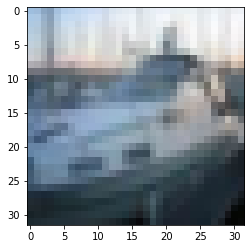

In [29]:
plt.imshow(X_test[2])

In [27]:
model.save('my_model')

INFO:tensorflow:Assets written to: my_model/assets
